## Data Visualization

This lab demonstrates how to communicate information through clean, concise,
and honest data visualization. We recommend completing the exercises in a Jupyter Notebook.

## Problem 1 (Bernstein Polynomials)
For an arbitrary value of n, the set B(n,k) forms a basis for the space of polynomials of degree n or less.

In [1]:
import numpy as np
from scipy import special, misc,stats
import matplotlib.pyplot as plt
import pandas as pd

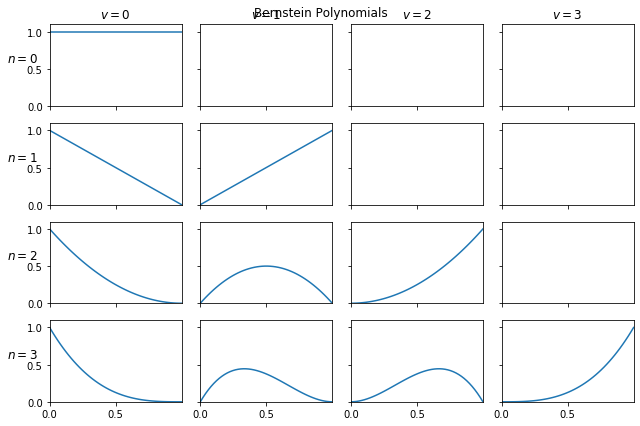

In [7]:
bernstein = lambda n, u, x: special.binom(n, u) * (x ** u) * ((1 - x) ** (n - u))
x = np.linspace(0, 1, 50)
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(9, 6))
for i in range(4):
    for j in range(i+1):
        axes[i,j].plot(x, bernstein(i, j, x))
        
cols = ['$v = {}$'.format(n) for n in range(0, 5)]
rows = ['$n = {}$'.format(u) for u in range(0, 5)]

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

plt.xticks(np.arange(0, 1, step=0.5))
plt.suptitle("Bernstein Polynomials")
plt.axis([0, 1, 0, 1.1])
plt.tight_layout()
plt.show()

AttributeError: module 'scipy.misc' has no attribute 'comb'

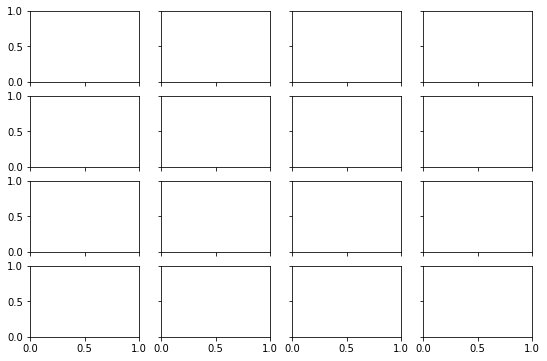

In [4]:
from scipy import misc
bernstein = lambda n, u, x: misc.comb(n, u) * (x ** u) * ((1 - x) ** (n - u))
x = np.linspace(0, 1, 50)
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(9, 6))
for i in range(4):
    for j in range(i+1):
        axes[i,j].plot(x, bernstein(i, j, x))
        
cols = ['$v = {}$'.format(n) for n in range(0, 5)]
rows = ['$n = {}$'.format(u) for u in range(0, 5)]

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

plt.xticks(np.arange(0, 1, step=0.5))
plt.suptitle("Bernstein Polynomials")
plt.axis([0, 1, 0, 1.1])
plt.tight_layout()
plt.show()

## Comments: Comb is deprecated now. It is useful now to just use scipy.special.

## Problem 2

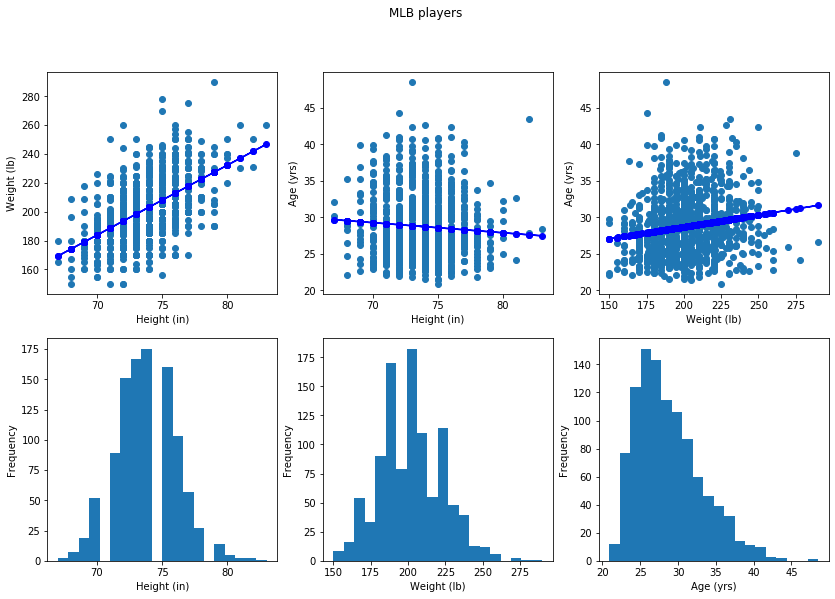

In [9]:
MLB = np.load("MLB.npy");
fig, axes = plt.subplots(2, 3, figsize=(14, 9))
axes[0,0].scatter(MLB[:,0], MLB[:,1])
axes[0,0].set_ylabel("Weight (lb)")
axes[0,0].set_xlabel("Height (in)")
slope, intercept, r_value, p_value, std_err = stats.linregress(MLB[:,0], MLB[:,1])
axes[0,0].plot(MLB[:,0], intercept + slope*MLB[:,0], 'bo-', label='line of fit')

axes[0,1].scatter(MLB[:,0], MLB[:,2])
axes[0,1].set_ylabel("Age (yrs)")
axes[0,1].set_xlabel("Height (in)")
slope, intercept, r_value, p_value, std_err = stats.linregress(MLB[:,0], MLB[:,2])
axes[0,1].plot(MLB[:,0], intercept + slope*MLB[:,0], 'bo-', label='line of fit')

axes[0,2].scatter(MLB[:,1], MLB[:,2])
axes[0,2].set_ylabel("Age (yrs)")
axes[0,2].set_xlabel("Weight (lb)")
slope, intercept, r_value, p_value, std_err = stats.linregress(MLB[:,1], MLB[:,2])
axes[0,2].plot(MLB[:,1], intercept + slope*MLB[:,1], 'bo-', label='line of fit')

axes[1,0].hist(MLB[:,0], bins=20);
axes[1,0].set_ylabel("Frequency")
axes[1,0].set_xlabel("Height (in)")
axes[1,1].hist(MLB[:,1], bins=20);
axes[1,1].set_ylabel("Frequency")
axes[1,1].set_xlabel("Weight (lb)")
axes[1,2].hist(MLB[:,2], bins=20);
axes[1,2].set_xlabel("Age (yrs)")
axes[1,2].set_ylabel("Frequency")

plt.suptitle("MLB players")
plt.show()

## Problem 3

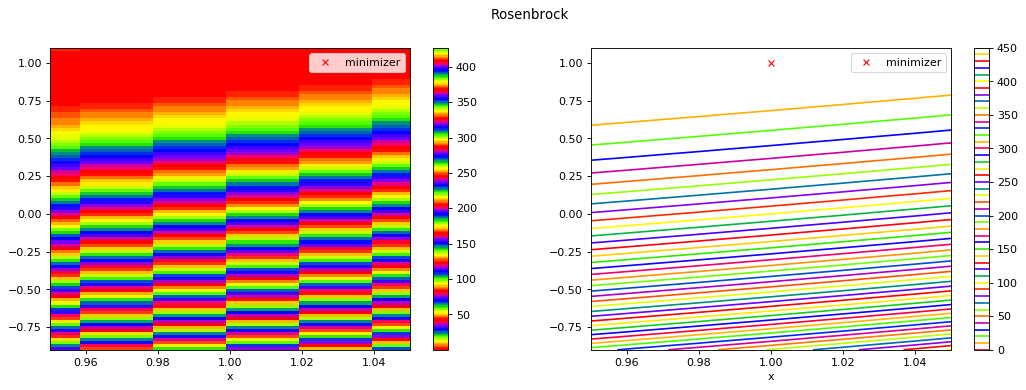

In [19]:
rosenbrock = lambda x, y: (1 - x)**2 + 100 * (y - x**2)**2
x = np.linspace(-.9, 1.1, 100)
X, Y = np.meshgrid(x, x)
Z = rosenbrock(X, Y)

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121)
ax = plt.gca()
plt.pcolormesh(X, Y, Z, cmap="prism") 
plt.colorbar()
point = pd.DataFrame({'x': [1], 'y': [1]})
point.plot(x='x', y='y', ax=ax, style='rx', label='minimizer')

plt.subplot(122)
ax = plt.gca()
plt.contour(X, Y, Z, 50, cmap="prism") # Contour map.
point.plot(x='x', y='y', ax=ax, style='rx', label='minimizer')
plt.colorbar()

plt.suptitle("Rosenbrock")

plt.show()

# Problem 4

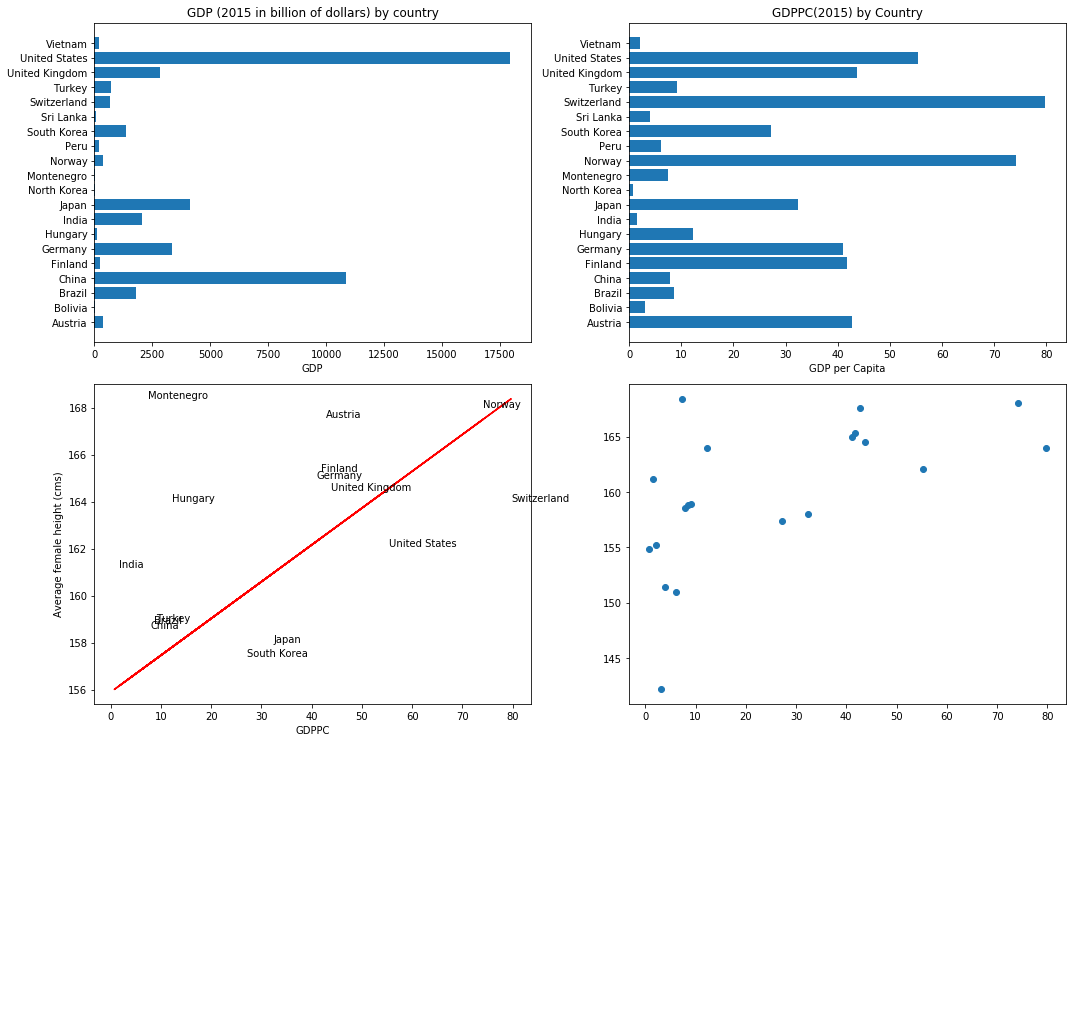

In [32]:
pop, gdp, maleH, femaleH = np.load("countries.npy").T
countries = ["Austria", "Bolivia", "Brazil", "China",
             "Finland", "Germany", "Hungary", "India",
             "Japan", "North Korea", "Montenegro", "Norway",
             "Peru", "South Korea", "Sri Lanka", "Switzerland",
             "Turkey", "United Kingdom", "United States", "Vietnam"]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Horizontal bar chart of GDP
positions = np.arange(len(countries))
axes[0,0].barh(positions, gdp, align="center")
axes[0,0].set_yticks(positions)
axes[0,0].set_yticklabels(countries)
axes[0,0].set_xlabel("GDP")
axes[0,0].set_title("GDP (2015 in billion of dollars) by country")

# Horiztonal bar chart of gdp per capita
axes[0,1].barh(positions, gdp/pop, align="center")
axes[0,1].set_yticks(positions)
axes[0,1].set_yticklabels(countries)
axes[0,1].set_xlabel("GDP per Capita")
axes[0,1].set_title("GDPPC(2015) by Country")

# Scatter plot GDPPC and female height                     
axes[1,1].scatter(gdp/pop, femaleH)
for i, name in enumerate(countries):
    axes[1,0].annotate(name, (gdp[i]/pop[i],femaleH[i]))
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp/pop, femaleH)
axes[1,0].plot(gdp/pop, intercept + slope*(gdp/pop), 'r', label='line of fit')
axes[1,0].set_xlabel("GDPPC")
axes[1,0].set_ylabel("Average female height (cms)") 
plt.tight_layout()
plt.show()

# # Scatter plot GDPPC and male height                     
# axes[1,1].scatter(gdp/pop, maleH)
# for i, name in enumerate(countries):
#     axes[1,0].annotate(name, (gdp[i]/pop[i],maleH[i]))
# slope, intercept, r_value, p_value, std_err = stats.linregress(gdp/pop, maleH)
# axes[1,0].plot(gdp/pop, intercept + slope*(gdp/pop), 'r', label='line of fit')
# axes[1,0].set_xlabel("GDPPC")
# axes[1,0].set_ylabel("Average male height (cms)") 
# plt.tight_layout()
# plt.show()


In [30]:
# Scatter plot GDPPC and female height                     
axes[1,1].scatter(gdp/pop, femaleH)
for i, name in enumerate(countries):
    axes[1,0].annotate(name, (gdp[i]/pop[i],femaleH[i]))
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp/pop, femaleH)
axes[1,0].plot(gdp/pop, intercept + slope*(gdp/pop), 'r', label='line of fit')
axes[1,0].set_xlabel("GDPPC")
axes[1,0].set_ylabel("Average female height (cms)") 
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>